In [ ]:
#載入套件
import tensorflow as tf
from tensorflow import keras

In [ ]:
#載入MNIST
from tensorflow.keras.datasets import mnist

(train_images , train_labels) , (test_images , test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 3s 0us/step


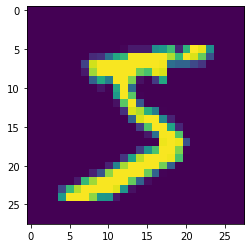

In [ ]:
#查看資料
import matplotlib.pyplot as plt

plt.imshow(train_images[0])

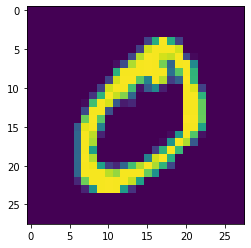

In [ ]:
plt.imshow(train_images[1])

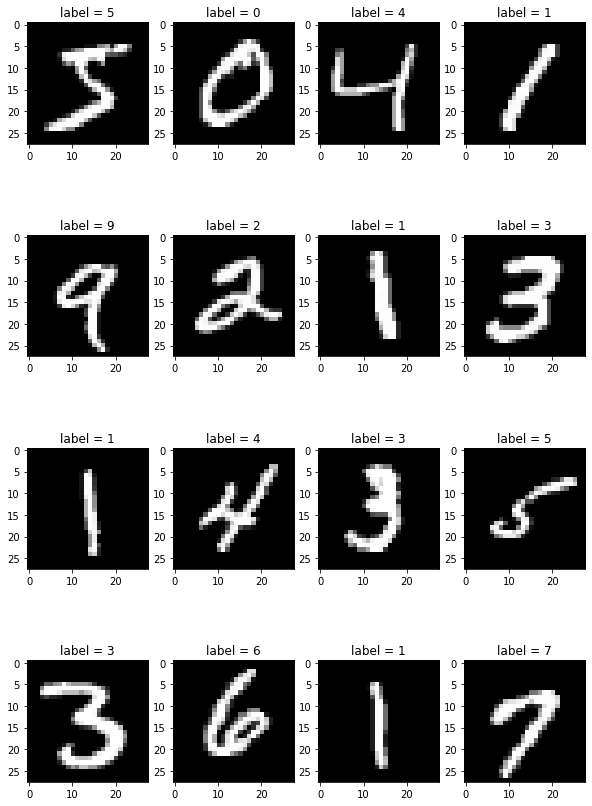

In [ ]:
#觀察前16個數字的影像與標籤
plt.gcf().set_size_inches(10,15) #圖形大小
for i in range(16):
  ax = plt.subplot(4,4,i+1)
  ax.imshow(train_images[i] , cmap = 'gray')
  ax.set_title('label = ' + str(train_labels[i]))
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


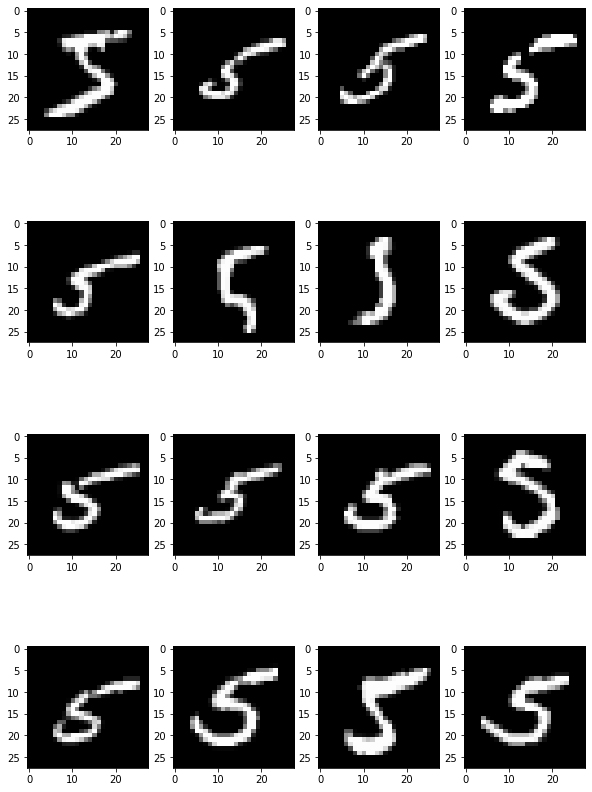

In [ ]:
#觀察前16個數字5的影像
plt.gcf().set_size_inches(10,15)
index = 0 ; graph_index = 0
while index < 16 :
  ax = plt.subplot(4,4,index+1)
  if train_labels[graph_index] == 5:
    ax.imshow(train_images[graph_index] , cmap = 'gray')
    index += 1 
    graph_index += 1
  else: 
    graph_index += 1

In [ ]:
#架構序列神經網路
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512 , activation = 'relu' , input_shape = (28*28,)))
#只有第一層需要指定輸入的大小
network.add(layers.Dense(10 , activation = 'softmax'))

In [ ]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
network.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [ ]:
#準備資料
train_images = train_images.reshape((60000, 28 * 28)) 
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [ ]:
#將標籤轉換成one_hot code
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels) #將數字0-9轉換成0或1的陣列
test_labels = to_categorical(test_labels)

In [ ]:
train_labels[1] #數字0被轉換成index[0]為1的陣列

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
#訓練模型
train = network.fit(train_images , train_labels , epochs = 5 , batch_size = 128)

Epoch 1/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0275 - accuracy: 0.9923
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0208 - accuracy: 0.9945
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0150 - accuracy: 0.9962
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0114 - accuracy: 0.9975
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0103 - accuracy: 0.9974


In [ ]:
#用測試資料評估模型的準確度
test_loss , test_acc = network.evaluate(test_images , test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0667 - accuracy: 0.9791
test_acc: 0.9790999889373779


In [ ]:
train.history

{'accuracy': [0.9923333525657654,
  0.9944833517074585,
  0.9961666464805603,
  0.9974833130836487,
  0.9974166750907898],
 'loss': [0.02745695784687996,
  0.020794440060853958,
  0.014965447597205639,
  0.011350095272064209,
  0.010250811465084553]}

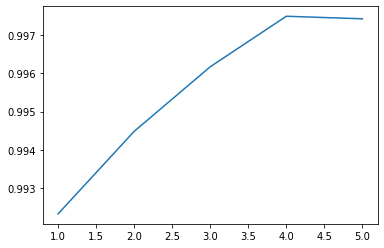

In [ ]:
#繪製圖形
epochs = range(1 , len(train.history['accuracy'])+1)
plt.plot(epochs , train.history['accuracy'])
plt.show()